In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir('/Users/alecclarkfeather/Downloads/bio_comp/')

['wildtype_structure_prediction_af2.pdb',
 'test.csv',
 'train_updates_20220929.csv',
 'train.csv',
 'sample_submission.csv']

In [5]:
train_df = pd.read_csv('/Users/alecclarkfeather/Downloads/bio_comp/train.csv', index_col='seq_id')
train_df.head()

,protein_sequence,pH,data_source,tm
seq_id,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [6]:
corrections = pd.read_csv('/Users/alecclarkfeather/Downloads/bio_comp/train_updates_20220929.csv', index_col='seq_id')
corrections.head()

,protein_sequence,pH,data_source,tm
seq_id,,,,
69,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN


In [7]:
all_features_nan = corrections.isnull().all('columns')
drop_indices = corrections[all_features_nan].index

swap_ph_tm_indices = corrections[~all_features_nan].index

train_df.loc[swap_ph_tm_indices, ['pH', 'tm']] = corrections.loc[swap_ph_tm_indices, ['pH', 'tm']]

In [8]:
train_df.shape

(31390, 4)

In [9]:
train_df.head(15)

,protein_sequence,pH,data_source,tm
seq_id,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
6,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,doi.org/10.1038/s41592-020-0801-4,45.7
7,AAENRPPIPGSLGMLYDSTLCVGCQACVTKCQDINFPERNPQGEQT...,7.0,doi.org/10.1038/s41592-020-0801-4,55.9
8,AAEYAVVLKTLSNPFWVDMKKGIEDEAKTLGVSVDIFASPSEGDFQ...,7.0,doi.org/10.1038/s41592-020-0801-4,48.1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31390 entries, 0 to 31389
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   protein_sequence  31390 non-null  object 
 1   pH                31104 non-null  float64
 2   data_source       28043 non-null  object 
 3   tm                31390 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.2+ MB


In [11]:
train_df['data_source'].nunique()

324

In [12]:
train_df['protein_sequence'].nunique()

28981

In [13]:
train_df['pH'].nunique()

110

In [14]:
train_df.duplicated().sum()

8

In [15]:
train_df = train_df.drop_duplicates()
train_df.shape

(31382, 4)

In [16]:
train_df.duplicated().sum()

0

In [17]:
train_df['seq_len'] = train_df['protein_sequence'].apply(len)
train_df

,protein_sequence,pH,data_source,tm,seq_len
seq_id,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451
...,...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8,549
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2,469
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6,128


In [18]:
test_df = pd.read_csv('/Users/alecclarkfeather/Downloads/bio_comp/test.csv', index_col='seq_id')
test_df.head()

,protein_sequence,pH,data_source
seq_id,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [22]:
#train_df.loc[98, 'protein_sequence']

'ADTIKVGVLHSLSGTMAISETTLKDTVLMMIEEQNKKGGLLGKQLEPVVVDPASNWPLFAEKTRELLSQEEVDVIFGCWTSVSRKSVLPVIEELNGLMFYPVQYEGEESSRNVFYTGAAPNQQAIPAVDYLLNEVGAKRFVLAGTDYVYPRTTNKILVSYLKSKGIADEDIMVNYTPFGHSDWQTIVSDVKKFGSAGKKTAVVSTVNGDANVPFYKELANQGISSEDIPVVAFSLGEEELSGFDAKPLVGHLAAWNYFMSADSEENEKFITQWHAYTKDDKRVTNDPMEATYIGFKMWAQAVEKAGSEDVDKVRAAMYGMTVPNLSGGTAVMNTNHHLSKPVLIGEIQEDGQFDIVWSTDGEVKGDAWTDFLPESKVLISDWTAPVNCGNYNTVTKTCGAPALASE'

In [23]:
train_df.groupby('data_source')['seq_len'].mean()

data_source
10.1002/(sici)1097-0134(19980301)30:4<401::aid-prot7>3.0.co;2-l     67.000000
10.1002/(sici)1097-0134(19990215)34:3<303::aid-prot4>3.0.co;2-h    130.000000
10.1002/bip.1981.360200921                                         164.000000
10.1002/bip.360261104                                              164.000000
10.1002/bip.360321103                                              164.000000
                                                                      ...    
10.1529/biophysj.106.103804                                        307.000000
10.2210/pdb1l16/pdb                                                164.000000
10.7554/eLife.34729                                                458.000000
10.7554/eLife.54639                                                246.000000
doi.org/10.1038/s41592-020-0801-4                                  488.834128
Name: seq_len, Length: 324, dtype: float64

In [28]:
null_ph_index = train_df.loc[train_df['pH'].isnull()].index

In [29]:
train_df['pH_null'] = 0

train_df.loc[null_ph_index, 'pH_null'] = 1

In [30]:
train_df.head()

,protein_sequence,pH,data_source,tm,seq_len,pH_null
seq_id,,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341,0
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286,0
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497,0
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265,0
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451,0


In [31]:
train_df['pH_null'].value_counts()

0    31096
1      286
Name: pH_null, dtype: int64

In [32]:
null_source_index = train_df.loc[train_df['data_source'].isnull()].index

train_df['source_null'] = 0

train_df.loc[null_source_index, 'source_null'] = 1

In [33]:
train_df['source_null'].value_counts()

0    28043
1     3339
Name: source_null, dtype: int64

In [34]:
train_df['seq_len'].describe()

count    31382.000000
mean       447.757377
std        640.786906
min          5.000000
25%        197.000000
50%        336.000000
75%        523.750000
max      32767.000000
Name: seq_len, dtype: float64

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 31390 to 33802
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   protein_sequence  2413 non-null   object
 1   pH                2413 non-null   int64 
 2   data_source       2413 non-null   object
dtypes: int64(1), object(2)
memory usage: 75.4+ KB


In [37]:
test_df['seq_len'] = test_df['protein_sequence'].apply(len)
test_df

,protein_sequence,pH,data_source,seq_len
seq_id,,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
...,...,...,...,...
33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221


In [38]:
test_df['seq_len'].unique()

array([221, 220])

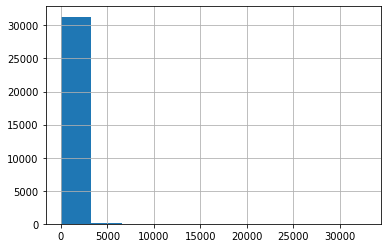

In [39]:
train_df['seq_len'].hist()
plt.show()

In [40]:
test_df['data_source'].nunique()

1

In [41]:
test_df['pH'].nunique()

1

In [42]:
train_df.loc[train_df['data_source']=='Novozymes']

,protein_sequence,pH,data_source,tm,seq_len,pH_null,source_null
seq_id,,,,,,,


In [43]:
#G		Glycine		Gly									P		Proline		Pro
#A		Alanine		Ala									V		Valine		Val
#L		Leucine		Leu									I		Isoleucine		Ile
#M		Methionine		Met									C		Cysteine		Cys
#F		Phenylalanine		Phe									Y		Tyrosine		Tyr
#W		Tryptophan		Trp									H		Histidine		His
#K		Lysine		Lys									R		Arginine		Arg
#Q		Glutamine		Gln									N		Asparagine		Asn
#E		Glutamic Acid		Glu									D		Aspartic Acid		Asp
#S		Serine		Ser									T		Threonine		Thr


In [44]:
aa_mapping = {'S': 0, 'G': 1, 'A': 2, 'L': 3, 'M': 4, 'F': 5, 
             'W': 6, 'K': 7, 'Q': 8, 'E': 9, 'P': 10, 'V': 11, 
             'I': 12, 'C': 13, 'Y': 14, 'H': 15, 'R': 16, 'N': 17,
             'D': 18, 'T': 19}

In [45]:
train_mod = train_df.loc[(train_df['seq_len']>=100) & (train_df['seq_len']<=600)]
train_mod

,protein_sequence,pH,data_source,tm,seq_len,pH_null,source_null
seq_id,,,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341,0,0
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286,0,0
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497,0,0
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265,0,0
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,380,0,0
...,...,...,...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8,549,0,0
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2,469,0,0
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6,128,0,0


In [46]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23847 entries, 0 to 31389
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   protein_sequence  23847 non-null  object 
 1   pH                23572 non-null  float64
 2   data_source       21256 non-null  object 
 3   tm                23847 non-null  float64
 4   seq_len           23847 non-null  int64  
 5   pH_null           23847 non-null  int64  
 6   source_null       23847 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [47]:
train_reduced = train_mod[['protein_sequence', 'pH', 'seq_len', 'tm']]
train_reduced

,protein_sequence,pH,seq_len,tm
seq_id,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,341,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,286,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,497,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,265,47.2
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,380,48.4
...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,549,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,469,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,128,64.6


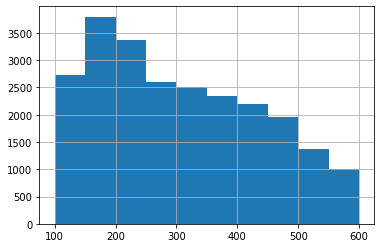

In [48]:
train_reduced['seq_len'].hist()
plt.show()

In [49]:
train_reduced.groupby('pH')['tm'].mean()

pH
1.99     39.600000
2.00     38.609259
2.02     35.466667
2.03     42.066667
2.10     27.800000
           ...    
10.00    76.075000
10.30    79.300000
10.40    40.700000
11.00    74.214815
53.40     0.500000
Name: tm, Length: 109, dtype: float64

In [50]:
train_reduced['first_50'] = train_reduced['protein_sequence'].apply(lambda x: x[:50])
train_reduced

<ipython-input-50-922124bdc1e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reduced['first_50'] = train_reduced['protein_sequence'].apply(lambda x: x[:50])


,protein_sequence,pH,seq_len,tm,first_50
seq_id,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,341,75.7,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,286,50.5,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,497,40.5,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,265,47.2,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,380,48.4,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...
...,...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,549,51.8,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,469,37.2,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,128,64.6,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...


In [51]:
train_reduced['last_50'] = train_reduced['protein_sequence'].apply(lambda x: x[-50:])
train_reduced

<ipython-input-51-3d7f266dcdf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reduced['last_50'] = train_reduced['protein_sequence'].apply(lambda x: x[-50:])


,protein_sequence,pH,seq_len,tm,first_50,last_50
seq_id,,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,341,75.7,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,GLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDR...
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,286,50.5,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,DRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLP...
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,497,40.5,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,SKPGPGAEESEGKDQWTDNKKTKAKEGGGSGSGQGDGGGGGFISKI...
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,265,47.2,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,DWALYDHLMDFLADRGVDNTFADELVELSTALEHQEYITFLEDLKS...
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,380,48.4,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,SGPYLDEIAELVDAGKIRPVIERTFPFSEVPEAFLKVERGHARGKT...
...,...,...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,549,51.8,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,KWEQIEGNSKLRHVGSNLCLDSRTAKSGGLSVEVCGPALSQQWKFS...
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,469,37.2,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,IASWMREDVLFVFTPVLVCRLPSKTVGIDDAISATGLLYSQFYRLN...
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,128,64.6,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,EEGKRWFDNLAANGKIEMAWQETFWAHGFGKVTDKFGVPWMINVVK...


In [52]:
train_reduced = train_reduced.drop(columns=['first_50', 'last_50', 'seq_len'], axis=1)
train_reduced

,protein_sequence,pH,tm
seq_id,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,48.4
...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6


In [56]:
train_reduced['protein_sequence'].str.len().max()

600

In [57]:
train_reduced = train_reduced[train_reduced['pH'] <= 11.0]
train_reduced.shape

(23568, 3)

In [59]:
#train_reduced

,protein_sequence,pH,tm,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,triplet_21,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,AAA,AKA,AAL,ALL,GEA,PEV,VDI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,AAA,DGE,PLH,NEE,ERA,GAG,QVG,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,AAA,FST,PRA,TSY,RIL,SSA,GSG,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,AAA,SGL,RTA,IPA,QPL,RHL,LQP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,48.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
train_reduced = train_reduced[['protein_sequence', 'pH', 'tm']]
train_reduced

,protein_sequence,pH,tm
seq_id,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,48.4
...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6


In [62]:
for seq_id in train_reduced.index:
    
    sequence = str(train_reduced.loc[seq_id, 'protein_sequence'])
    seq_len = len(sequence)
    
    for j in range(3, 603, 3):
        
        train_reduced.loc[seq_id, f'triplet_{j}'] = sequence[j-3:j] if j <= seq_len else 0

<ipython-input-62-10990227aa72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reduced.loc[seq_id, f'triplet_{j}'] = sequence[j-3:j] if j <= seq_len else 0
<ipython-input-62-10990227aa72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reduced.loc[seq_id, f'triplet_{j}'] = sequence[j-3:j] if j <= seq_len else 0
<ipython-input-62-10990227aa72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [63]:
train_reduced

,protein_sequence,pH,tm,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,triplet_21,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,AAA,AKA,AAL,ALL,GEA,PEV,VDI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,AAA,DGE,PLH,NEE,ERA,GAG,QVG,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,AAA,FST,PRA,TSY,RIL,SSA,GSG,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,AAA,SGL,RTA,IPA,QPL,RHL,LQP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,48.4,AAC,FWR,RTV,IPK,PPF,RGI,STT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,YYM,YSG,GGS,ALA,AGG,GGA,GRK,...,0,0,0,0,0,0,0,0,0,0
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,YYN,DQH,RLS,SYS,VET,AMF,LSW,...,0,0,0,0,0,0,0,0,0,0
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,YYQ,RTL,GAE,LLY,KIS,FGE,MPK,...,0,0,0,0,0,0,0,0,0,0


In [64]:
train_triplets = train_reduced[[col for col in train_reduced.columns if col.startswith('triplet')]]
train_triplets

,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,triplet_21,triplet_24,triplet_27,triplet_30,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
0,AAA,AKA,AAL,ALL,GEA,PEV,VDI,WLP,AGW,RQP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,DGE,PLH,NEE,ERA,GAG,QVG,RSL,PQE,SEE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,FST,PRA,TSY,RIL,SSA,GSG,STR,ADA,PQV,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,SGL,RTA,IPA,QPL,RHL,LQP,APR,PCL,RPF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AAC,FWR,RTV,IPK,PPF,RGI,STT,SAR,STV,MPA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,YYM,YSG,GGS,ALA,AGG,GGA,GRK,GDW,NDI,DSI,...,0,0,0,0,0,0,0,0,0,0
31386,YYN,DQH,RLS,SYS,VET,AMF,LSW,ERA,IVK,PGA,...,0,0,0,0,0,0,0,0,0,0
31387,YYQ,RTL,GAE,LLY,KIS,FGE,MPK,SAQ,DSA,ENC,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#train_triplets.dtypes

triplet_3      object
triplet_6      object
triplet_9      object
triplet_12     object
triplet_15     object
                ...  
triplet_588    object
triplet_591    object
triplet_594    object
triplet_597    object
triplet_600    object
Length: 200, dtype: object

In [70]:
#train_triplets[train_triplets['triplet_585']==0.0]

,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,triplet_21,triplet_24,triplet_27,triplet_30,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
0,AAA,AKA,AAL,ALL,GEA,PEV,VDI,WLP,AGW,RQP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,DGE,PLH,NEE,ERA,GAG,QVG,RSL,PQE,SEE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,FST,PRA,TSY,RIL,SSA,GSG,STR,ADA,PQV,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,SGL,RTA,IPA,QPL,RHL,LQP,APR,PCL,RPF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AAC,FWR,RTV,IPK,PPF,RGI,STT,SAR,STV,MPA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31383,YYL,WHK,AAS,TVA,SIH,ESI,DKS,KKR,DKE,VSI,...,0,0,0,0,0,0,0,0,0,0
31385,YYM,YSG,GGS,ALA,AGG,GGA,GRK,GDW,NDI,DSI,...,0,0,0,0,0,0,0,0,0,0
31386,YYN,DQH,RLS,SYS,VET,AMF,LSW,ERA,IVK,PGA,...,0,0,0,0,0,0,0,0,0,0


In [71]:
train_triplets = train_triplets.replace(0.0, 'ZZZ')

In [72]:
train_triplets

,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,triplet_21,triplet_24,triplet_27,triplet_30,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
0,AAA,AKA,AAL,ALL,GEA,PEV,VDI,WLP,AGW,RQP,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
1,AAA,DGE,PLH,NEE,ERA,GAG,QVG,RSL,PQE,SEE,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
2,AAA,FST,PRA,TSY,RIL,SSA,GSG,STR,ADA,PQV,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
3,AAA,SGL,RTA,IPA,QPL,RHL,LQP,APR,PCL,RPF,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
5,AAC,FWR,RTV,IPK,PPF,RGI,STT,SAR,STV,MPA,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,YYM,YSG,GGS,ALA,AGG,GGA,GRK,GDW,NDI,DSI,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31386,YYN,DQH,RLS,SYS,VET,AMF,LSW,ERA,IVK,PGA,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31387,YYQ,RTL,GAE,LLY,KIS,FGE,MPK,SAQ,DSA,ENC,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ


In [73]:
train_triplets_arr = train_triplets.values
train_triplets_arr

array([['AAA', 'AKA', 'AAL', ..., 'ZZZ', 'ZZZ', 'ZZZ'],
       ['AAA', 'DGE', 'PLH', ..., 'ZZZ', 'ZZZ', 'ZZZ'],
       ['AAA', 'FST', 'PRA', ..., 'ZZZ', 'ZZZ', 'ZZZ'],
       ...,
       ['YYQ', 'RTL', 'GAE', ..., 'ZZZ', 'ZZZ', 'ZZZ'],
       ['YYS', 'FSD', 'NIT', ..., 'ZZZ', 'ZZZ', 'ZZZ'],
       ['YYV', 'PDE', 'YWQ', ..., 'ZZZ', 'ZZZ', 'ZZZ']], dtype=object)

In [74]:
import tensorflow as tf

In [75]:
train_triplets_tf = tf.constant(train_triplets_arr)
train_triplets_tf

<tf.Tensor: shape=(23568, 200), dtype=string, numpy=
array([[b'AAA', b'AKA', b'AAL', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'AAA', b'DGE', b'PLH', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'AAA', b'FST', b'PRA', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       ...,
       [b'YYQ', b'RTL', b'GAE', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'YYS', b'FSD', b'NIT', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'YYV', b'PDE', b'YWQ', ..., b'ZZZ', b'ZZZ', b'ZZZ']],
      dtype=object)>

In [76]:
layer = tf.keras.layers.StringLookup()
layer.adapt(train_triplets_tf)
layer.get_vocabulary()

['[UNK]',
 'ZZZ',
 'LAK',
 'EKL',
 'LLL',
 'AKK',
 'AAA',
 'DEA',
 'SSS',
 'AAL',
 'ALA',
 'LAL',
 'AAV',
 'EEE',
 'ALV',
 'SSL',
 'ALG',
 'AGA',
 'ATL',
 'LTL',
 'LRL',
 'ALL',
 'LLA',
 'AAG',
 'LGL',
 'EAL',
 'LAA',
 'SGS',
 'VLL',
 'LAE',
 'LDK',
 'LDA',
 'AKL',
 'GGG',
 'ELA',
 'LLS',
 'ALE',
 'VVV',
 'SLL',
 'AIV',
 'IKA',
 'LEE',
 'VEK',
 'ELL',
 'SAG',
 'VAL',
 'AVN',
 'SAT',
 'LLE',
 'RGL',
 'SIL',
 'LIG',
 'KKG',
 'DVD',
 'SAL',
 'SKG',
 'ALK',
 'GIG',
 'YLL',
 'EEA',
 'LVL',
 'TGV',
 'LEA',
 'LGA',
 'PSL',
 'LKE',
 'LVG',
 'EAQ',
 'AGL',
 'EAA',
 'TKS',
 'EEL',
 'KPV',
 'AIG',
 'EAS',
 'LVA',
 'LRN',
 'KAL',
 'LQQ',
 'ATS',
 'NAA',
 'GLL',
 'AGF',
 'VAA',
 'VRR',
 'RLL',
 'LSS',
 'ALR',
 'KEL',
 'SED',
 'AAK',
 'LLK',
 'DAV',
 'IDG',
 'NAD',
 'RAL',
 'SGQ',
 'LRI',
 'LLG',
 'LSL',
 'TNS',
 'LAR',
 'RTG',
 'LEK',
 'DTV',
 'HLL',
 'ANA',
 'RGI',
 'VLA',
 'VLV',
 'ELG',
 'RVI',
 'NGV',
 'GSG',
 'VEN',
 'RAK',
 'AEL',
 'SAA',
 'LKK',
 'KKL',
 'SNV',
 'GAG',
 'EDP',
 'PET',
 'ASA'

In [77]:
data_tf = layer(train_triplets_tf)
data_tf

<tf.Tensor: shape=(23568, 200), dtype=int64, numpy=
array([[   6,  219,    9, ...,    1,    1,    1],
       [   6,  768, 3787, ...,    1,    1,    1],
       [   6, 1127, 2630, ...,    1,    1,    1],
       ...,
       [5578,  221,  549, ...,    1,    1,    1],
       [4553, 2139, 2474, ...,    1,    1,    1],
       [5435, 1980, 7521, ...,    1,    1,    1]])>

In [85]:
np.max(data_tf)

8001

In [94]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(8002, 32, input_length=200))
model.add(tf.keras.layers.Conv1D(32, 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [96]:
#model(data_tf)

In [98]:
X = data_tf
y = tf.constant(train_reduced['tm'].values)

In [99]:
X.shape

TensorShape([23568, 200])

In [100]:
y.shape

TensorShape([23568])

In [101]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [102]:
history = model.fit(X, y, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
185/185 [==============================] - 20s 104ms/step - loss: 190.7118 - mean_squared_error: 190.7118
Epoch 2/5
185/185 [==============================] - 26s 143ms/step - loss: 94.7398 - mean_squared_error: 94.7398
Epoch 3/5
185/185 [==============================] - 22s 121ms/step - loss: 66.6629 - mean_squared_error: 66.6629
Epoch 4/5
185/185 [==============================] - 21s 115ms/step - loss: 58.3979 - mean_squared_error: 58.3979
Epoch 5/5
185/185 [==============================] - 20s 109ms/step - loss: 54.5995 - mean_squared_error: 54.5995


In [103]:
X_preds = model.predict(X)
X_preds

737/737 [==============================] - 5s 6ms/step


array([[73.32716 ],
       [52.67244 ],
       [40.252174],
       ...,
       [58.65326 ],
       [38.522537],
       [37.41363 ]], dtype=float32)

In [104]:
y

<tf.Tensor: shape=(23568,), dtype=float64, numpy=array([75.7, 50.5, 40.5, ..., 64.6, 50.7, 37.6])>

In [105]:
test_df

,protein_sequence,pH,data_source,seq_len
seq_id,,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
...,...,...,...,...
33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221


In [106]:
test_df_seq = test_df.reset_index()
test_df_seq

,seq_id,protein_sequence,pH,data_source,seq_len
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221


In [107]:
test_df_ids = test_df_seq[['seq_id']]
test_df_ids

,seq_id
0,31390
1,31391
2,31392
3,31393
4,31394
...,...
2408,33798
2409,33799
2410,33800
2411,33801


In [108]:
test_df

,protein_sequence,pH,data_source,seq_len
seq_id,,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
...,...,...,...,...
33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221
33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221


In [109]:
for seq_id in test_df.index:
    
    sequence = str(test_df.loc[seq_id, 'protein_sequence'])
    seq_len = len(sequence)
    
    for j in range(3, 603, 3):
        
        test_df.loc[seq_id, f'triplet_{j}'] = sequence[j-3:j] if j <= seq_len else 'ZZZ'
        
test_df

<ipython-input-109-415d778641c0>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df.loc[seq_id, f'triplet_{j}'] = sequence[j-3:j] if j <= seq_len else 'ZZZ'
<ipython-input-109-415d778641c0>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df.loc[seq_id, f'triplet_{j}'] = sequence[j-3:j] if j <= seq_len else 'ZZZ'
<ipython-input-109-415d778641c0>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

,protein_sequence,pH,data_source,seq_len,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,AEK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,AKK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220,VPV,NPE,PDA,TSV,ENV,AKT,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,ALC,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,ALF,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,ILK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,LLK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,VPV,NPE,PDA,TSV,ENV,NLK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ


In [110]:
test_set = test_df[[col for col in test_df.columns if col.startswith('triplet_')]]
test_set

,triplet_3,triplet_6,triplet_9,triplet_12,triplet_15,triplet_18,triplet_21,triplet_24,triplet_27,triplet_30,...,triplet_573,triplet_576,triplet_579,triplet_582,triplet_585,triplet_588,triplet_591,triplet_594,triplet_597,triplet_600
seq_id,,,,,,,,,,,,,,,,,,,,,
31390,VPV,NPE,PDA,TSV,ENV,AEK,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31391,VPV,NPE,PDA,TSV,ENV,AKK,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31392,VPV,NPE,PDA,TSV,ENV,AKT,GSG,DSQ,SDP,IKA,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31393,VPV,NPE,PDA,TSV,ENV,ALC,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
31394,VPV,NPE,PDA,TSV,ENV,ALF,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33798,VPV,NPE,PDA,TSV,ENV,ILK,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
33799,VPV,NPE,PDA,TSV,ENV,LLK,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ
33800,VPV,NPE,PDA,TSV,ENV,NLK,TGS,GDS,QSD,PIK,...,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ,ZZZ


In [111]:
test_triplets_tf = tf.constant(test_set)
test_triplets_tf

<tf.Tensor: shape=(2413, 200), dtype=string, numpy=
array([[b'VPV', b'NPE', b'PDA', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'VPV', b'NPE', b'PDA', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'VPV', b'NPE', b'PDA', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       ...,
       [b'VPV', b'NPE', b'PDA', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'VPV', b'NPE', b'PDA', ..., b'ZZZ', b'ZZZ', b'ZZZ'],
       [b'VPV', b'NPE', b'PDA', ..., b'ZZZ', b'ZZZ', b'ZZZ']],
      dtype=object)>

In [112]:
test_triplets_formatted = layer(test_triplets_tf)
test_triplets_formatted

<tf.Tensor: shape=(2413, 200), dtype=int64, numpy=
array([[ 581, 1738, 1851, ...,    1,    1,    1],
       [ 581, 1738, 1851, ...,    1,    1,    1],
       [ 581, 1738, 1851, ...,    1,    1,    1],
       ...,
       [ 581, 1738, 1851, ...,    1,    1,    1],
       [ 581, 1738, 1851, ...,    1,    1,    1],
       [ 581, 1738, 1851, ...,    1,    1,    1]])>

In [113]:
test_preds = model.predict(test_triplets_formatted)
test_preds

76/76 [==============================] - 1s 7ms/step


array([[38.775543],
       [38.777233],
       [51.87625 ],
       ...,
       [38.614494],
       [39.406124],
       [38.696804]], dtype=float32)

In [115]:
#test_preds_np = test_preds.numpy()
#test_preds_np

In [116]:
test_preds.shape

(2413, 1)

In [117]:
test_preds_reshaped = test_preds.reshape(-1)
test_preds_reshaped

array([38.775543, 38.777233, 51.87625 , ..., 38.614494, 39.406124,
       38.696804], dtype=float32)

In [118]:
test_df_ids['tm'] = test_preds_reshaped
test_df_ids

<ipython-input-118-b7db012835f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_ids['tm'] = test_preds_reshaped


,seq_id,tm
0,31390,38.775543
1,31391,38.777233
2,31392,51.876251
3,31393,38.315422
4,31394,39.607525
...,...,...
2408,33798,39.267605
2409,33799,38.432228
2410,33800,38.614494
2411,33801,39.406124


In [119]:
test_df_ids.to_csv('novozyme_submit1.csv', index=False)

In [120]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(8002, 32, input_length=200))
model.add(tf.keras.layers.LSTM(32, return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [121]:
#model(X)

<tf.Tensor: shape=(23568, 1), dtype=float32, numpy=
array([[-1.1892694e-02],
       [-1.1892689e-02],
       [-1.1811415e-02],
       ...,
       [-1.1892690e-02],
       [ 5.5031502e-05],
       [-1.0922490e-02]], dtype=float32)>

In [122]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [123]:
history = model.fit(X, y, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
185/185 [==============================] - 49s 244ms/step - loss: 731.7047 - mean_squared_error: 731.7047
Epoch 2/5
185/185 [==============================] - 38s 203ms/step - loss: 226.9677 - mean_squared_error: 226.9677
Epoch 3/5
185/185 [==============================] - 38s 204ms/step - loss: 223.8619 - mean_squared_error: 223.8619
Epoch 4/5
185/185 [==============================] - 38s 205ms/step - loss: 213.4330 - mean_squared_error: 213.4330
Epoch 5/5
185/185 [==============================] - 44s 236ms/step - loss: 203.5789 - mean_squared_error: 203.5789


In [124]:
model.predict(X)

737/737 [==============================] - 21s 27ms/step


array([[51.748264],
       [41.8002  ],
       [55.24335 ],
       ...,
       [46.69826 ],
       [53.875633],
       [54.271168]], dtype=float32)

In [125]:
test_preds2 = model.predict(test_triplets_formatted)
test_preds2

76/76 [==============================] - 2s 28ms/step


array([[43.899147],
       [43.907265],
       [43.65564 ],
       ...,
       [43.898754],
       [43.901585],
       [43.900772]], dtype=float32)

In [126]:
test_df_ids['tm'] = test_preds2.reshape(-1)
test_df_ids

<ipython-input-126-23391bddd3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_ids['tm'] = test_preds2.reshape(-1)


,seq_id,tm
0,31390,43.899147
1,31391,43.907265
2,31392,43.655640
3,31393,43.901192
4,31394,43.900143
...,...,...
2408,33798,43.895287
2409,33799,43.909351
2410,33800,43.898754
2411,33801,43.901585


In [128]:
test_df_ids.to_csv('novozyme_submit2b.csv', index=False)